In [66]:
%load_ext autoreload
%autoreload 2

In [87]:
import librosa

import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

from pathlib import Path
import scipy.signal

import src.utils.dsp_utils as dsp

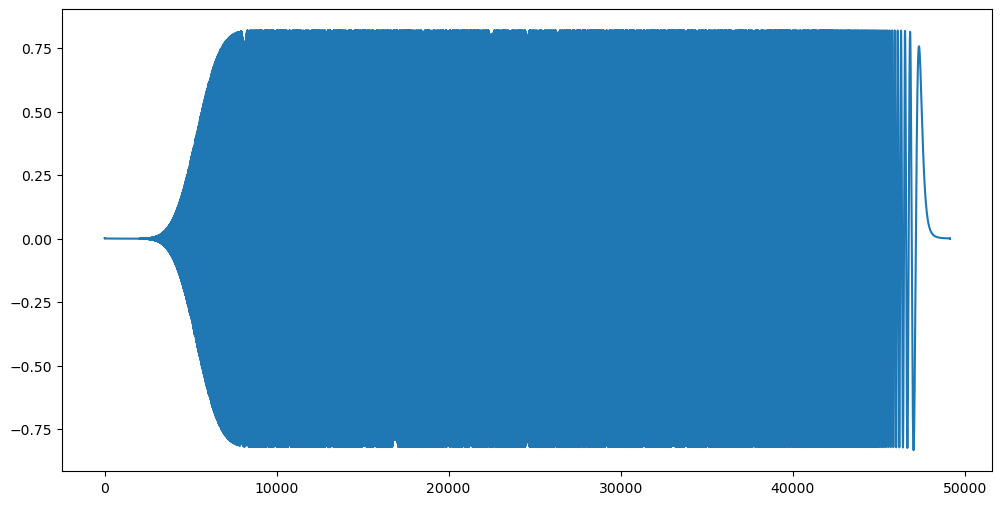

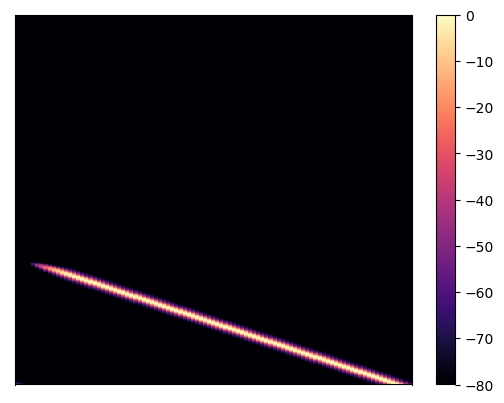

In [80]:
Fs = 48000

tsp_path = Path('../data/tsp.wav')
tsp, fs = sf.read(tsp_path)
if not Fs == fs:
    tsp = librosa.resample(tsp, orig_sr=fs, target_sr=Fs)

plt.figure(figsize=(12,6))
plt.plot(tsp)
# plt.xlim([0, 3000])
plt.show()

D = librosa.stft(tsp)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure()
import librosa.display
librosa.display.specshow(S_db)
plt.colorbar()

tsp_11rep_len = len(tsp)*11

../../../Dataset/RIR-Recording0702/75.wav
(2016000, 5)


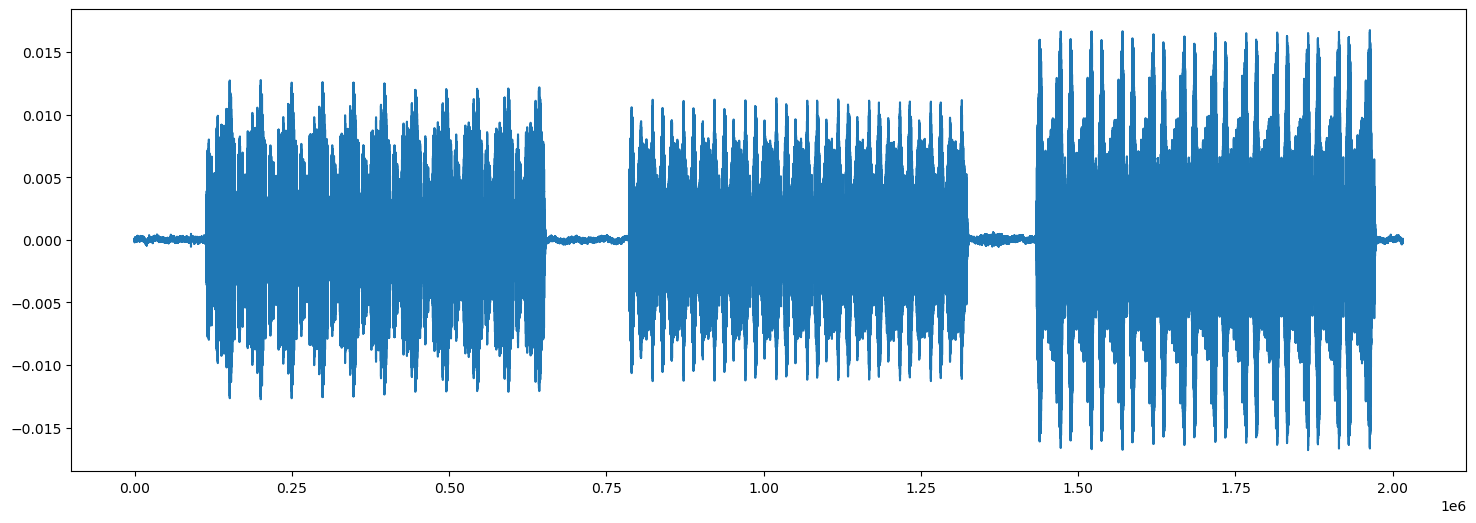

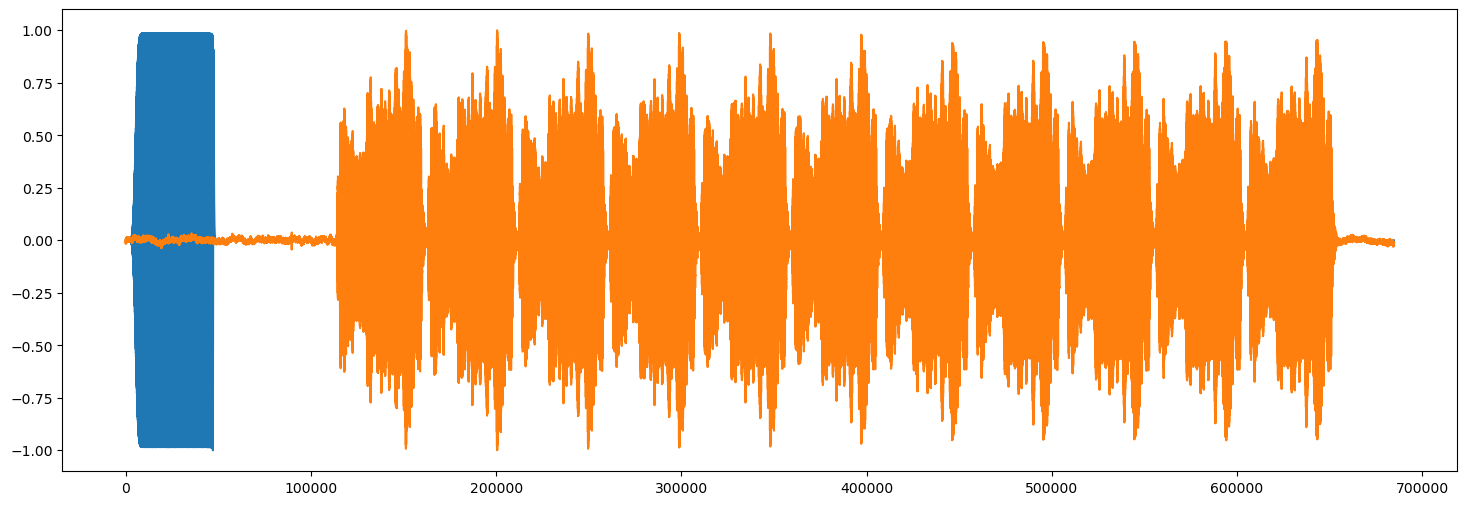

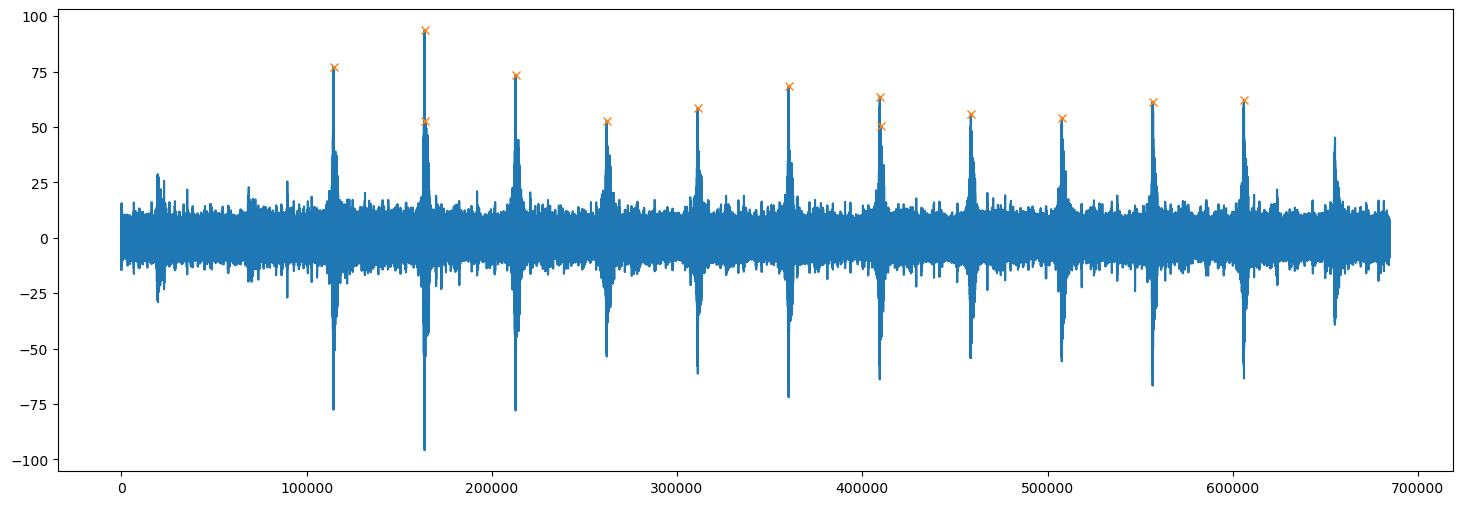

ZeroDivisionError: division by zero

In [97]:
data_dir = Path('../../../Dataset/RIR-Recording0702/')
rirs_paths = data_dir.glob('*.wav')

for path in rirs_paths:
    if 'test' in str(path):
        continue
    print(path)
    wav, fs = sf.read(path)
    
    
    print(wav.shape)
    nsamples, nmics = wav.shape
    
    
    plt.figure(figsize=(18,6))
    plt.plot(wav[:,0])
    plt.show()
    
    # decorration
    for i in range(nmics):
        
        L = tsp_11rep_len
        offset_init = 3*Fs
        
        _wav, _tsp = dsp.make_same_length(wav[:offset_init+L,i], tsp)
        
        _wav = dsp.normalize(dsp.center(_wav))
        _tsp = dsp.normalize(dsp.center(_tsp))
        _rir = dsp.classic_deconvolution(_wav, _tsp)
        
        # find the first peak
        peaks, _ = scipy.signal.find_peaks(_rir, height=50, distance=400)
        
        plt.figure(figsize=(18,6))        
        plt.plot(_tsp)
        plt.plot(_wav)
        plt.show()

        plt.figure(figsize=(18,6))        
        plt.plot(_rir)
        plt.plot(peaks, _rir[peaks], "x")
        plt.show()
        
        1/0
    
    
    # markers
    plt.axvline(x=tsp_start)
    
    
    plt.show()
    
    
    
    break

In [39]:
T = len(tsp)

In [40]:
L = len(wav)

In [43]:
(L - 3*T*3)/fs

8.208

In [ ]:
3 + 